In [6]:

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [3]:
PATH='./data/processed_data/Training/'
IMG = 'glioma_tumor/gg (1).jpg'

### Original image 

In [ ]:
img = load_img(PATH+IMG)
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
img

### Random Rotation Augmentation 

In [ ]:

train_data_gen = ImageDataGenerator(
    rotation_range=50) 
it = train_data_gen.flow(samples, batch_size=1)

In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### Horizontal and Vertical Flip Augmentation 

In [ ]:
samples = expand_dims(data, 0)
train_data_gen = ImageDataGenerator(
    vertical_flip=True,
 horizontal_flip=True) 
it = train_data_gen.flow(samples, batch_size=1)

In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### Random Brightness Augmentation 

In [ ]:
samples = expand_dims(data, 0)
train_data_gen = ImageDataGenerator(
       brightness_range=[0.2,0.8]) 
it = train_data_gen.flow(samples, batch_size=1)

In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### Horizontal and Vertical Shift Augmentation 

In [ ]:
samples = expand_dims(data, 0)
train_data_gen = ImageDataGenerator(
        width_shift_range=0.3,
    height_shift_range=0.3)
it = train_data_gen.flow(samples, batch_size=1)

In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### Random Zoom Augmentation 

In [ ]:
samples = expand_dims(data, 0)
train_data_gen = ImageDataGenerator(
       zoom_range=[0.4,1])
it = train_data_gen.flow(samples, batch_size=1)



In [ ]:
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [4]:
def hist_normalization(img):

    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    cv2.waitKey(0)
    return img_output

### Data preprocessing- Histogram equilization 

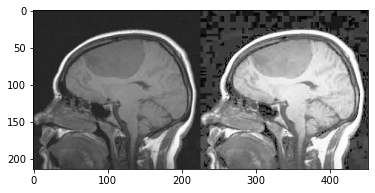

In [26]:
from scipy import ndimage, misc
import numpy as np
import os
import cv2
import imageio


PATH='./data/Training/'
IMG = 'meningioma_tumor/m1(181).jpg'

image_to_process = imageio.imread(PATH + IMG)
equ = hist_normalization(image_to_process)
res = np.hstack((image_to_process,equ)) #stacking images side-by-side
pyplot.imshow(res)